In [6]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import scipy 
import torchvision.transforms as tf
import torch
import torchvision
from kornia.filters import gaussian_blur2d, spatial_gradient
import kornia
import cv2 as cv
import math
import random
import skimage as sk
import flowToColor as FTC

In [ ]:
# # For corridor example 
# # READS IN IMAGES AND CONVERTS THEM INTO [0-1] GRAY SCALE VALUES
# circPad = tf.Pad((15))
# imgPathFirstPath = './Sequences/corridor/bt_0.png'
# imgFirst = torchvision.io.read_image(imgPathFirstPath)/255 # tensor
# imgFirst = circPad(imgFirst)
# imgFirst = imgFirst.unsqueeze(0)
# imgFirstNumpy = (kornia.utils.tensor_to_image(imgFirst)) # image as a numpy Array
# plt.imshow(imgFirstNumpy,cmap='gray')

# imgPathSecondPath = './Sequences/corridor/bt_1.png' 
# imgSecond = torchvision.io.read_image(imgPathSecondPath)/255 # tensor
# imgSecond = circPad(imgSecond)
# imgSecond = imgSecond.unsqueeze(0)
# imgSecondNumpy = (kornia.utils.tensor_to_image(imgSecond)) # image as a numpy Array
# plt.imshow(imgSecondNumpy,cmap='gray')

# print(imgSecondNumpy.shape)
# print(imgFirstNumpy.shape)

(230, 230)
(230, 230)


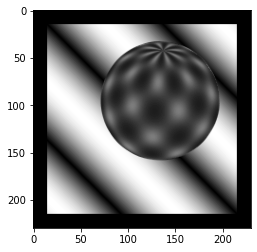

In [38]:
# For sphere example 
# READS IN IMAGES AND CONVERTS THEM INTO [0-1] GRAY SCALE VALUES
imgPathFirstPath = './Sequences/sphere/sphere_0.png'
imgFirst = cv.imread(imgPathFirstPath)
imgFirst = cv.cvtColor(imgFirst, cv.COLOR_BGR2GRAY)
imgFirst = np.pad(imgFirst, 15, mode='constant')
imgFirstNumpy = imgFirst/255


imgPathSecondPath = './Sequences/sphere/sphere_1.png'
imgSecond = cv.imread(imgPathSecondPath)
imgSecond = cv.cvtColor(imgSecond, cv.COLOR_BGR2GRAY)
imgSecond = np.pad(imgSecond, 15, mode='constant')
imgSecondNumpy = imgSecond/255
print(imgSecondNumpy.shape)
print(imgFirstNumpy.shape)

plt.imshow(imgFirst,cmap='gray')

In [39]:

def computeDirivativeX(img):
    print(img.shape)
    xDerivativeFilter = [-1,8,0,-8,1]
    newImage = np.empty([img.shape[0], img.shape[1]])
    for x in range(3,img.shape[0]-3):
        for y in range(3,img.shape[1]-3):
            negTwo = img[x-2][y] * xDerivativeFilter[0]
            negOne = img[x-1][y] * xDerivativeFilter[1]
            posOne = img[x+1][y] * xDerivativeFilter[3]
            posTwo = img[x+2][y] * xDerivativeFilter[4]
            value = negOne+posOne+posTwo+negTwo
            value = value/12
#             print(value)
            newImage[x][y] = value
    return newImage
def computeDirivativeY(img):
    print(img.shape)
    yDerivativeFilter = [-1,8,0,-8,1]
    newImage = np.empty([img.shape[0], img.shape[1]])
    for x in range(3,img.shape[0]-3):
        for y in range(3,img.shape[1]-3):
            negTwo = img[x][y-2] * yDerivativeFilter[0]
            negOne = img[x][y-1] * yDerivativeFilter[1]
            posOne = img[x][y+1] * yDerivativeFilter[3]
            posTwo = img[x][y+2] * yDerivativeFilter[4]
            value = negOne+posOne+posTwo+negTwo
            value = value/12
#             print(value)
            newImage[x][y] = value
    return newImage
def blurImage(img):
    newImage = np.empty([img.shape[0], img.shape[1]])
    for x in range(3,img.shape[0]-3):
        for y in range(3,img.shape[1]-3):
            blurvalue=0
            blurvalue += img[x-1][y-1]*1
            blurvalue += img[x][y-1]*2
            blurvalue += img[x+1][y-1]*1
            blurvalue += img[x-1][y]*2
            blurvalue += img[x][y]*4
            blurvalue += img[x+1][y]*2
            blurvalue += img[x-1][y+1]*1
            blurvalue += img[x][y+1]*2
            blurvalue += img[x+1][y+1]*1
            newImage[x][y] = blurvalue/16
    return newImage


(230, 230)
(230, 230)
(230, 230)
(230, 230)


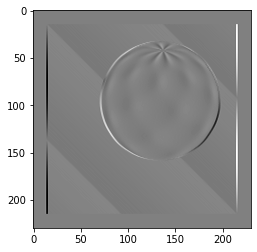

In [40]:

def computeDirivativeXRegular(img):
    print(img.shape)
    xDerivativeFilter = [-1,0,1]
    newImage = np.empty([img.shape[0], img.shape[1]])
    for x in range(3,img.shape[0]-1):
        for y in range(3,img.shape[1]-1):
            negOne = img[x-1][y] * xDerivativeFilter[0]
            posOne = img[x+1][y] * xDerivativeFilter[2]
            value = negOne+posOne
            value = value/3
#             print(value)
            newImage[x][y] = value
    return newImage
def computeDirivativeYRegular(img):
    print(img.shape)
    yDerivativeFilter = [-1,0,1]
    newImage = np.empty([img.shape[0], img.shape[1]])
    for x in range(3,img.shape[0]-1):
        for y in range(3,img.shape[1]-1):
            negOne = img[x][y-1] * yDerivativeFilter[0]
            posOne = img[x][y+1] * yDerivativeFilter[2]
            value = negOne+posOne
            value = value/3
#             print(value)
            newImage[x][y] = value
    return newImage
img1xDir = computeDirivativeX(imgFirstNumpy)
img1yDir = computeDirivativeY(imgFirstNumpy)
img1Blur = blurImage(imgFirstNumpy)

img2xDir = computeDirivativeXRegular(imgSecondNumpy)
img2yDir = computeDirivativeYRegular(imgSecondNumpy)
img2Blur = blurImage(imgSecondNumpy)

# plt.imshow(img1xDir,cmap='gray')
plt.imshow(img1yDir,cmap='gray')
# plt.imshow(img1Blur,cmap='gray')

In [ ]:
plt.imshow(img1xDirSquared,cmap='gray')


In [49]:
img1xDirSquared = np.square(img1xDir)
img1yDirSquared = np.square(img1yDir)
img1XYdir = np.multiply(img1xDir,img1yDir)


img2xDirSquared = np.square(img2xDir)
img2yDirSquared = np.square(img2yDir)
img2XYdir = np.multiply(img2xDir,img2yDir)

Ixx1_blur = blurImage(img1xDirSquared)
Iyy1_blur = blurImage(img1yDirSquared)
Ixy1_blur = blurImage(img1XYdir)

# plt.imshow(b,cmap='gray')

def HarrisCornerDetect():
    leftSide = np.multiply(Ixx1_blur,Iyy1_blur) - np.square(Ixy1_blur)
    rightSide = 0.04*(np.add(Ixx1_blur,Iyy1_blur))
    rightSide = np.square(rightSide)
    r = leftSide - rightSide 

    rPruned = np.zeros((imgFirst.shape[0], imgFirst.shape[1]))
    rPrunedList = list()
    A = list()
    for x in range(0,imgFirst.shape[0]):
        for y in range(0,imgFirst.shape[1]):
            if r[x][y]>0.0000000005: 
                rPruned[x][y] = 1
                rPrunedList.append([x,y])
            else :
                rPruned[x][y] = 0
    return rPrunedList,rPruned
    # _________________________________________________________________________________
            
listOfCorners,mapOfCorners = HarrisCornerDetect()
print(len(listOfCorners))
# To get the flow at one point i have to have a window of 3 by 3 
# and get the summation of the partial derivative of each point and get the sum 

#     aTaInverse = np.linalg.inv(np.multiply(aTranspose,a))
#     oneLeft = np.multiply(aTaInverse,aTranspose)
#     rightSidee = np.multiply(oneLeft,ItAvg)
#     print(rightSidee.shape)
#     x = np.array([[1], [1]])
#     test = np.linalg.solve(x,rightSidee)
#     return 0
#     return IxxAvg,IyyAvg,IxyAvg
        
    
#     for top left i need the summation of a 3 by 3 window for the partial derivative of x SO 

# print(points)


# plt.imshow(points,cmap='gray')

11890


In [88]:
def getFlowWithWindow(thePoint,w): # where thePoint is an x,y tuple WINDOW SIZE 3
    pX = thePoint[0]
    pY = thePoint[1]
    w = int(w/2)

    IxIxSum=0
    IyIySum=0
    
    IxIySum=0
    
    IxItSum=0
    IyItSum=0
    
    for i in range(-w,w+1):
        for j in range (-w,w+1):
            IxIxSum += pow(img1xDir[pX+i][pY+j],2)
            IyIySum += pow(img1yDir[pX+i][pY+j],2)
            IxIySum += img1xDir[pX+i][pY+j]*img1yDir[pX+i][pY+j]
            IxItSum += img1xDir[pX+i][pY+j]*tempDiv[pX+i][pY+j]
            IyItSum += img1yDir[pX+i][pY+j]*tempDiv[pX+i][pY+j]
    IxItSum = -1 * IxItSum 
    IyItSum = -1 * IyItSum
    
    a = np.array([[IxIxSum,IxIySum],[IxIySum,IyIySum]])
#   if np.min(abs(np.linalg.eigvals(np.matmul(A.T, A)))) >= tau:
    if np.min(np.linalg.eig(a)): 
        ATB = np.array([[IxItSum],[IyItSum]])
        uv = np.dot(a,ATB)
    return uv
#     aInverse = np.linalg.inv(a)
    
#     aTranspose = np.transpose(a)
#     aInverseMulaTranspose = np.multiply(aInverse,aTranspose)
#     UV = np.dot(aInverseMulaTranspose,ATB)
    
    



SyntaxError: invalid syntax (197041016.py, line 26)

In [108]:
def getFlowWithWindow2(thePoint,w): # where thePoint is an x,y tuple WINDOW SIZE 3
    pX = thePoint[0]
    pY = thePoint[1]
    w = int(w/2)

    IxIxSum=0
    IyIySum=0
    
    IxIySum=0
    
    IxItSum=0
    IyItSum=0
    
    for i in range(-w,w+1):
        for j in range (-w,w+1):
            IxIxSum += pow(img1xDir[pX+i][pY+j],2)
            IyIySum += pow(img1yDir[pX+i][pY+j],2)
            IxIySum += img1xDir[pX+i][pY+j]*img1yDir[pX+i][pY+j]
            IxItSum += img1xDir[pX+i][pY+j]*tempDiv[pX+i][pY+j]
            IyItSum += img1yDir[pX+i][pY+j]*tempDiv[pX+i][pY+j]
    IxItSum = -1 * IxItSum 
    IyItSum = -1 * IyItSum
    a = np.array([[IxIxSum,IxIySum],[IxIySum,IyIySum]])
    if np.min(abs(np.linalg.eigvals(a))) >= 0.001:
        aInverse = np.linalg.inv(a)
        ATB = np.array([[IxItSum],[IyItSum]])
        uv = np.dot(aInverse,ATB)
    else:
        uv=[0,0]
              
    return uv
#     aInverse = np.linalg.inv(a)
    
#     aTranspose = np.transpose(a)
#     aInverseMulaTranspose = np.multiply(aInverse,aTranspose)
#     UV = np.dot(aInverseMulaTranspose,ATB)

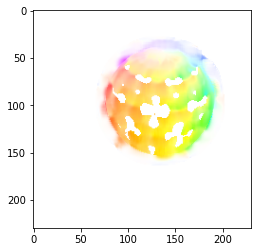

In [109]:
UVMap = np.zeros((imgFirst.shape[0],imgFirst.shape[0],2))

for x in range (15,imgFirst.shape[0]-15):
    for y in range(15,imgFirst.shape[1]-15):
            u,v=getFlowWithWindow2([x,y],9)
            UVMap[x][y][0]=u
            UVMap[x][y][1]=v
colorMap = FTC.flowToColor(UVMap)
plt.imshow(colorMap)


        
# for x,y in listOfCorners:
#     u,v=getFlowWithWindow2([x,y],5)
#     UVMap[x][y][0]=u
#     UVMap[x][y][1]=v
# colorMap = FTC.flowToColor(UVMap)
# plt.imshow(colorMap)
# print(mapOfCorners.shape)
# # UVMap = np.zeros((262, 262,2))

# # VMap = np.zeros((262, 262))
# tempPiece = listOfCorners[24]
# u,v=getFlowWithWindow(tempPiece,3)

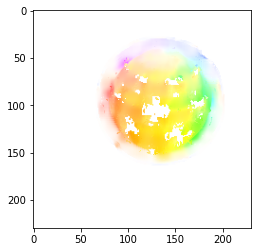

In [110]:
for x,y in listOfCorners:
    u,v=getFlowWithWindow2([x,y],15)
    UVMap[x][y][0]=u
    UVMap[x][y][1]=v
colorMap2 = FTC.flowToColor(UVMap)
plt.imshow(colorMap2)

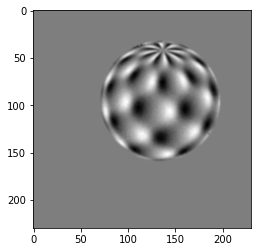

In [95]:
def imageDifference(img1,img2): 
    newImage = np.empty([img1.shape[0], img1.shape[1]])
    for x in range(0,img1.shape[0]):
        for y in range(0,img1.shape[1]):
            dif = img2[x][y]-img1[x][y]
            newImage[x][y] = dif
    return newImage
tempDiv = imageDifference(img1Blur,img2Blur)
plt.imshow(tempDiv,cmap='gray')